In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Config
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_df_file = "City_Weather_List.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

601

# Perform API Calls

1) Perform a weather check on each city using a series of successive API calls.
2) Include a print log of each city as it'sbeing processed (with the city number and city name).

In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [6]:
# set up lists to hold reponse info
city_list=[] 
latitude=[]
longitude=[]
temperature=[]
humidity=[]
cloudiness=[]
wind_speed=[]

# Counters
one_of_fifty_count=0
one_of_ten_count=1
total_cities_count=0

print("Beginning Data Retrieval")
print("-----------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response['name'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temperature.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        one_of_fifty_count+=1
        print(f"Processing Record {one_of_fifty_count} of Set {one_of_ten_count} | {city}")
        total_cities_count+=1
        if one_of_fifty_count==50:
            one_of_ten_count+=1
            one_of_fifty_count=0
            time.sleep(10)
    except:
        print(f'City not found. Skipping... {city}')
    
print(f"Total cities processed: {total_cities_count}")

# Make DataFrame from Dictionary of lists
df=pd.DataFrame({'city':city_list,
               'latitude':latitude,
               'longitude':longitude,
                'temperature':temperature,
                'humidity':humidity,
                'cloudiness':cloudiness,
                'wind_speed':wind_speed})

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | barrow
City not found. Skipping... jiddah
Processing Record 2 of Set 1 | broken hill
Processing Record 3 of Set 1 | santa rosa
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | keti bandar
Processing Record 6 of Set 1 | tarpon springs
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | khatanga
Processing Record 9 of Set 1 | goya
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | turan
Processing Record 15 of Set 1 | hasaki
Processing Record 16 of Set 1 | san patricio
Processing Record 17 of Set 1 | beruwala
Processing Record 18 of Set 1 | aykhal
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | carnduff
Pro

Processing Record 26 of Set 4 | hudiksvall
Processing Record 27 of Set 4 | morden
Processing Record 28 of Set 4 | robertsport
Processing Record 29 of Set 4 | bad ischl
Processing Record 30 of Set 4 | burns lake
Processing Record 31 of Set 4 | jinchang
Processing Record 32 of Set 4 | butaritari
Processing Record 33 of Set 4 | nichinan
Processing Record 34 of Set 4 | staryy nadym
Processing Record 35 of Set 4 | springbok
Processing Record 36 of Set 4 | tanout
Processing Record 37 of Set 4 | aranos
Processing Record 38 of Set 4 | chicama
Processing Record 39 of Set 4 | sangar
Processing Record 40 of Set 4 | wajid
Processing Record 41 of Set 4 | finnsnes
Processing Record 42 of Set 4 | turkan
Processing Record 43 of Set 4 | beringovskiy
Processing Record 44 of Set 4 | guangyuan
Processing Record 45 of Set 4 | verkh-usugli
Processing Record 46 of Set 4 | miranda
Processing Record 47 of Set 4 | lakatoro
City not found. Skipping... severnyy
Processing Record 48 of Set 4 | ponta delgada
Proces

Processing Record 7 of Set 8 | kungurtug
Processing Record 8 of Set 8 | pozo colorado
Processing Record 9 of Set 8 | henties bay
Processing Record 10 of Set 8 | arkadak
Processing Record 11 of Set 8 | borodyanka
Processing Record 12 of Set 8 | meulaboh
Processing Record 13 of Set 8 | emerald
Processing Record 14 of Set 8 | gamba
Processing Record 15 of Set 8 | paamiut
Processing Record 16 of Set 8 | grand gaube
City not found. Skipping... banmo
Processing Record 17 of Set 8 | tamandare
Processing Record 18 of Set 8 | saint-francois
Processing Record 19 of Set 8 | kavieng
City not found. Skipping... gzhatsk
Processing Record 20 of Set 8 | omsukchan
Processing Record 21 of Set 8 | bubaque
Processing Record 22 of Set 8 | hovd
Processing Record 23 of Set 8 | goroka
City not found. Skipping... stornoway
Processing Record 24 of Set 8 | salvacion
Processing Record 25 of Set 8 | san carlos de bariloche
Processing Record 26 of Set 8 | mocuba
Processing Record 27 of Set 8 | cidreira
Processing R

Processing Record 41 of Set 11 | ulladulla
Processing Record 42 of Set 11 | biak
Total cities processed: 542


In [7]:
df

,city,latitude,longitude,temperature,humidity,cloudiness,wind_speed
0,Barrow,-38.31,-60.23,39.06,42,0,4.00
1,Broken Hill,-31.97,141.45,70.74,34,76,11.83
2,Santa Rosa,-36.62,-64.29,45.27,33,0,7.02
3,Punta Arenas,-53.16,-70.91,39.20,100,75,23.04
4,Keti Bandar,24.14,67.45,80.46,98,0,9.82
5,Tarpon Springs,28.15,-82.76,83.66,69,90,6.93
6,Avarua,-21.21,-159.78,71.60,60,75,13.87
7,Khatanga,71.98,102.47,32.85,95,44,3.67
8,Goya,-29.14,-59.27,55.62,89,0,18.43
9,Jamestown,-33.21,138.60,77.49,21,68,10.49


In [8]:
df.to_csv(output_df_file)

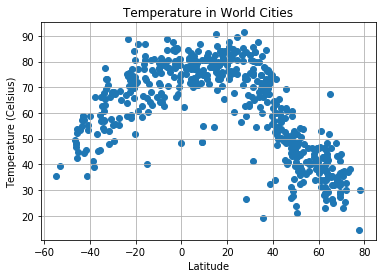

In [9]:
# Build a scatter plot for each data type
plt.scatter(df["latitude"], df["temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

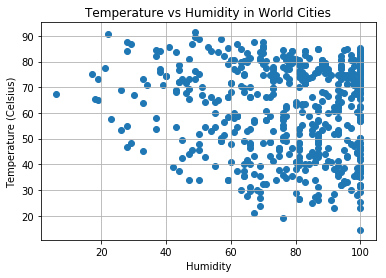

In [15]:
# Build a scatter plot for each data type
plt.scatter(df["humidity"], df["temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature vs Humidity in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

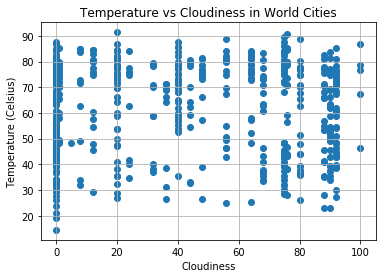

In [13]:
# Build a scatter plot for each data type
plt.scatter(df["cloudiness"], df["temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature vs Cloudiness in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

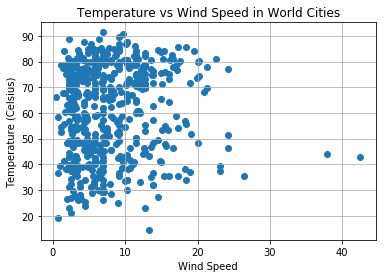

In [14]:
# Build a scatter plot for each data type
plt.scatter(df["wind_speed"], df["temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature vs Wind Speed in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()